In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from zipfile import ZipFile
from io import BytesIO

# Image manipulation.
import PIL.Image
from IPython.display import display



def load_image_blackandwhite(filename):
    #image = PIL.Image.open(filename)

    image = PIL.Image.open(filename) # open colour image
    image = image.convert('L') # convert image to black and white
    image = np.array(image)
    
    return np.float32(image)

In [41]:
def plot_image(image):
    # Assume the pixel-values are scaled between 0 and 255.
    
    # Convert the pixel-values to the range between 0.0 and 1.0
    image = np.clip(image/255.0, 0.0, 1.0)
        
    # Plot using matplotlib.
    plt.imshow(image, interpolation='lanczos')
    plt.show()

In [3]:
def reshape_image(image_file, new_wigth, new_height):
    
    ############
    # Reduce Size of Image
    ############
    
    olddim = np.shape(image_file)
    img = np.zeros((new_wigth,new_height))
    newdim = np.shape(img)
        
    for r in range(newdim[0]):
        if (newdim[0] <= olddim[0]):
            centerx=(r)/newdim[0]*olddim[0]
            lowerx=max(0,int(round(centerx-olddim[0]/newdim[0]/2,0)))
            upperx=min(olddim[0],int(round(centerx+olddim[0]/newdim[0]/2,0))+1)
        else:
            lowerx=max(0,int(r*olddim[0]/newdim[0]))
            upperx=min(lowerx+1,olddim[0]-1)+1
            
        for c in range(newdim[1]):  
            if (newdim[1] <= olddim[1]):
                centery=(c)/newdim[1]*olddim[1]
                lowery=max(0,int(round(centery-olddim[1]/newdim[1]/2,0)))
                uppery=min(olddim[1],int(round(centery+olddim[1]/newdim[1]/2,0))+1)
            else:
                lowery=max(0,int(c*olddim[1]/newdim[1]))
                uppery=min(lowery+1,olddim[1]-1)+1
            img[r,c] = np.mean(image_file[ lowerx:upperx, lowery:uppery ])

                
    return img

In [4]:
train = ZipFile("train.rotfaces.zip", 'r')
train.namelist()[0:5]

['train/',
 'train/0-10049200_1891-09-16_1958.jpg',
 'train/0-10110600_1985-09-17_2012.jpg',
 'train/0-10126400_1964-07-07_2010.jpg',
 'train/0-1013900_1917-10-15_1960.jpg']

In [52]:
image = load_image_blackandwhite(filename=BytesIO(train.read(train.namelist()[150])))
image

array([[ 82.,  55.,  30., ..., 120.,  94.,  74.],
       [ 80.,  66.,  61., ..., 102.,  95.,  71.],
       [ 94.,  44.,  48., ..., 115.,  90.,  69.],
       ...,
       [221., 225., 209., ..., 173., 136., 123.],
       [230., 216., 229., ..., 128., 115., 105.],
       [ 84., 238., 223., ...,  99., 102.,  98.]], dtype=float32)

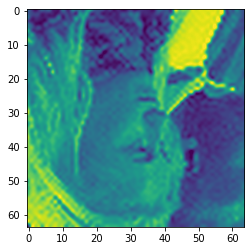

In [6]:
plot_image(image)

In [16]:
image

array([[ 82.,  55.,  30., ..., 120.,  94.,  74.],
       [ 80.,  66.,  61., ..., 102.,  95.,  71.],
       [ 94.,  44.,  48., ..., 115.,  90.,  69.],
       ...,
       [221., 225., 209., ..., 173., 136., 123.],
       [230., 216., 229., ..., 128., 115., 105.],
       [ 84., 238., 223., ...,  99., 102.,  98.]], dtype=float32)

In [61]:
#Directory containing images you wish to convert
input_dir = "train"

directories = os.listdir(input_dir)

index = 0
index2 = 0

for folder in directories:
	#Ignoring .DS_Store dir
	if folder == '.DS_Store':
		pass

	else:
		print (folder)

		folder2 = os.listdir(input_dir + '/' + folder)
		index += 1

		for image in folder2:
			if image == ".DS_Store":
				pass

			else:
				index2 += 1

				im = Image.open(input_dir+"/"+folder+"/"+image) #Opening image
				im = (np.array(im)) #Converting to numpy array

				try:
					r = im[:,:,0] #Slicing to get R data
					g = im[:,:,1] #Slicing to get G data
					b = im[:,:,2] #Slicing to get B data

					if index2 != 1:
						new_array = np.array([[r] + [g] + [b]], np.uint8) #Creating array with shape (3, 100, 100)
						out = np.append(out, new_array, 0) #Adding new image to array shape of (x, 3, 100, 100) where x is image number

					elif index2 == 1:
						out = np.array([[r] + [g] + [b]], np.uint8) #Creating array with shape (3, 100, 100)

					if index == 1 and index2 == 1:
						index_array = np.array([[index]])

					else:
						new_index_array = np.array([[index]], np.int8)
						index_array = np.append(index_array, new_index_array, 0)

				except Exception as e:
					print (e)
					print ("Removing image" + image)
					os.remove(input_dir+"/"+folder+"/"+image)

print (index)

np.save('X_train.npy', out) #Saving train image arrays
np.save('Y_train.npy', index_array) #Saving train labels


FileNotFoundError: [WinError 3] O sistema não conseguiu localizar o caminho especificado: ''

In [64]:
#BytesIO(train.read(train.namelist()[150]))
im = PIL.Image.open(BytesIO(train.read(train.namelist()[150])))
im = (np.array(im))

r = im[:,:,0].flatten()
g = im[:,:,1].flatten()
b = im[:,:,2].flatten()
label = [1]

#out = np.array(list(label) + list(r) + list(g) + list(b),np.uint8)
new_array = np.array([[r] + [g] + [b]], np.uint8)
#out.tofile("out.bin")
#plot_image(out)
new_array.shape, im.shape

((1, 3, 4096), (64, 64, 3))

In [68]:
im2 = PIL.Image.open(BytesIO(train.read(train.namelist()[150])))
im2 = (np.array(im2))
im3 = reshape_image(im2, 32, 32)
im3.shape

(32, 32)

In [70]:
im3[0]

array([ 74.08333333,  56.83333333,  57.88888889,  53.5       ,
        39.83333333,  61.72222222,  67.55555556,  89.11111111,
       123.61111111, 102.05555556,  63.5       ,  46.        ,
        39.33333333,  41.94444444,  52.33333333,  66.88888889,
        60.88888889,  42.66666667,  41.11111111,  60.27777778,
        69.61111111, 122.66666667, 191.16666667, 197.5       ,
       227.83333333, 236.        , 237.27777778, 237.83333333,
       234.55555556, 138.16666667, 111.61111111, 110.33333333])

In [71]:
im[0]

array([[ 76,  82,  98],
       [ 48,  55,  71],
       [ 19,  33,  46],
       [ 41,  59,  73],
       [ 58,  79,  96],
       [ 53,  74,  91],
       [ 69,  82, 101],
       [ 32,  41,  56],
       [ 27,  29,  42],
       [ 33,  37,  46],
       [ 80,  88,  99],
       [ 49,  62,  71],
       [ 45,  55,  65],
       [ 99, 102, 109],
       [ 87,  71,  72],
       [126,  98,  95],
       [113,  76,  70],
       [162, 126, 114],
       [161, 132, 114],
       [106,  84,  63],
       [ 89,  67,  54],
       [ 80,  66,  57],
       [ 55,  53,  41],
       [ 41,  42,  36],
       [ 54,  50,  51],
       [ 35,  26,  29],
       [ 48,  38,  36],
       [ 49,  36,  28],
       [ 44,  27,  17],
       [ 64,  42,  28],
       [ 85,  58,  41],
       [ 62,  37,  17],
       [ 65,  50,  29],
       [ 58,  51,  35],
       [ 47,  42,  38],
       [ 47,  38,  39],
       [ 43,  25,  23],
       [ 54,  35,  28],
       [ 95,  84,  64],
       [ 92,  80,  58],
       [ 88,  69,  52],
       [ 87,  65

In [51]:
r,g,b,label

(array([ 76,  48,  19, ..., 138, 138, 133], dtype=uint8),
 array([82, 55, 33, ..., 85, 90, 87], dtype=uint8),
 array([98, 71, 46, ..., 67, 70, 64], dtype=uint8),
 [1])

In [33]:
len(train_list)

48896

In [7]:
import pandas as pd

train_truth = pd.read_csv('train.truth.csv')
train_truth.head()

,fn,label
0,0-10049200_1891-09-16_1958.jpg,rotated_left
1,0-10110600_1985-09-17_2012.jpg,rotated_left
2,0-10126400_1964-07-07_2010.jpg,upright
3,0-1013900_1917-10-15_1960.jpg,rotated_right
4,0-10166400_1960-03-12_2008.jpg,upside_down


In [8]:
train_truth.label.value_counts()

rotated_right    12314
rotated_left     12266
upright          12212
upside_down      12104
Name: label, dtype: int64

In [9]:
#fucntion to one-hot-encode the ground truth labels
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(columns=col, axis=1), pd.get_dummies(df[col], drop_first=False, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df;

train_truth = create_dummy_df(train_truth,['label'],False)
train_truth.head()

,fn,rotated_left,rotated_right,upright,upside_down
0,0-10049200_1891-09-16_1958.jpg,1,0,0,0
1,0-10110600_1985-09-17_2012.jpg,1,0,0,0
2,0-10126400_1964-07-07_2010.jpg,0,0,1,0
3,0-1013900_1917-10-15_1960.jpg,0,1,0,0
4,0-10166400_1960-03-12_2008.jpg,0,0,0,1


In [17]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [18]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [19]:
y_train.shape

(50000, 10)

In [20]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [36]:
train_list[0].shape

(64, 64)